## MRR transfer function, measured data with a fitting curve

In [1]:
is_notebook = True

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
from scipy.optimize import curve_fit

In [3]:
# the svg format figure will not render text as paths, but embed the font as text
plt.rcParams['svg.fonttype'] = 'none'

# change default font for all plots
plt.rcParams['font.family'] ='sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams['font.size'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14


# change other settings to ease the work in Adobe Illustrator
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.pad']= 6 # spacing between axes to x ticks, this also includes spacing between label and ticks
plt.rcParams['ytick.major.pad']= 6 # spacing between axes to y ticks
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titlepad'] = 10
plt.rcParams['axes.labelpad'] = 6
plt.rcParams['axes.labelsize'] = 14

In [4]:
if is_notebook:
    %matplotlib widget

In [5]:
data_path = './Experiment_data/'
data_file = 'Experiment-Vpp_Heater voltage.xlsx'
save_to_path = './Experiment_results/'

data = pd.read_excel(data_path+data_file)
heater_voltage = data['Heater voltage'].to_numpy()
Vpp = data['Vpp'].to_numpy()

Curve fitting using a decayed sine function

In [6]:
def func(x, p, k):
    y = np.sin(2*np.pi*x*p)*np.exp(-k*x**2)
    return y

In [7]:
normalized_vpp = (Vpp-np.min(Vpp))/(np.max(Vpp)-np.min(Vpp))
normalized_vpp = normalized_vpp*2-1

popt, pcov = curve_fit(func, heater_voltage, normalized_vpp)

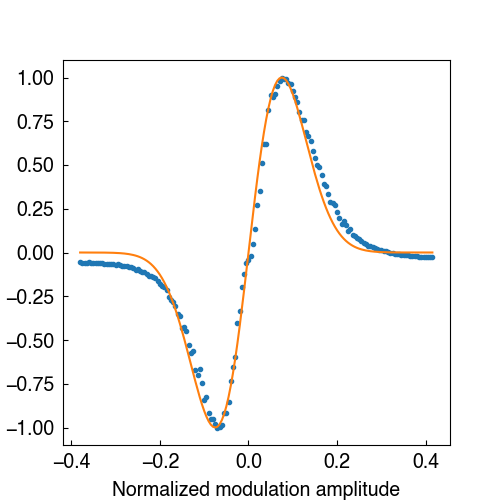

In [8]:
# Create a figure and two subplots
fig, ax = plt.subplots()
fig.set_size_inches((5, 5))
ax.plot(heater_voltage, normalized_vpp,'.')
y_ = func(heater_voltage,popt[0]-1.6, popt[1]+60)
y_ = (y_-np.min(y_))/(np.max(y_)-np.min(y_))
y_ = y_*2-1
ax.plot(heater_voltage+0.00, y_)
ax.set_xlabel('Normalized modulation amplitude')
ax.set_ylabel('Heater voltage (V)')
plt.show()

In [9]:
fig.savefig(save_to_path+'Figure2b.svg', format='svg', dpi=600)